In [2]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent  # part de /notebooks → remonte à la racine
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))


import pandas as pd
from src.utils.path import PROCESSED_DIR
import matplotlib.pyplot as plt

## Dataframe informations

In [3]:
DATA_PATH = PROCESSED_DIR / "dataset_full.parquet"

df = pd.read_parquet(DATA_PATH)
print(df.info()) # Le df est indexé sur la date 



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344 entries, 2020-01-03 to 2025-05-02
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close_CAC40         1344 non-null   float64
 1   High_CAC40          1344 non-null   float64
 2   Low_CAC40           1344 non-null   float64
 3   Open_CAC40          1344 non-null   float64
 4   Volume_CAC40        1344 non-null   int64  
 5   Close_STOXX600      1344 non-null   float64
 6   High_STOXX600       1344 non-null   float64
 7   Low_STOXX600        1344 non-null   float64
 8   Open_STOXX600       1344 non-null   float64
 9   Volume_STOXX600     1344 non-null   int64  
 10  Close_EUROSTOXX50   1344 non-null   float64
 11  High_EUROSTOXX50    1344 non-null   float64
 12  Low_EUROSTOXX50     1344 non-null   float64
 13  Open_EUROSTOXX50    1344 non-null   float64
 14  Volume_EUROSTOXX50  1344 non-null   int64  
 15  MA_5_CAC40          1340 non-null   f

## Dataframe visualization
### Index plots

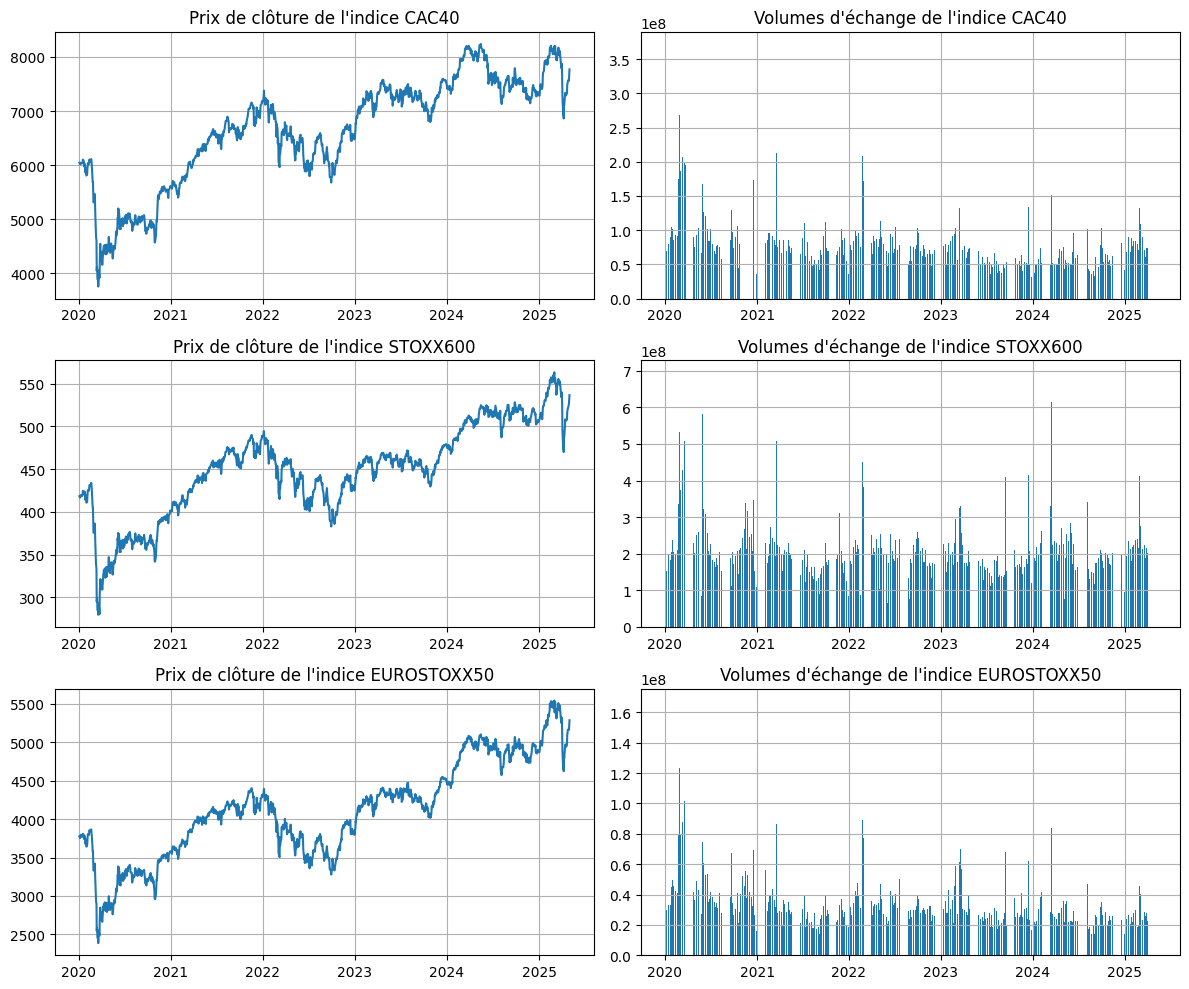

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [33]:
closing_prices = ["Close_CAC40", "Close_STOXX600", "Close_EUROSTOXX50"]
volumes = ["Volume_CAC40", "Volume_STOXX600", "Volume_EUROSTOXX50"]
index = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i in range(3):
    axes[i, 0].plot(df.index, df[closing_prices[i]])
    axes[i, 0].set_title(f"Prix de clôture de l'indice {index[i]}")
    axes[i, 0].grid(True)

    axes[i, 1].bar(df.index, df[volumes[i]])
    axes[i, 1].set_title(f"Volumes d'échange de l'indice {index[i]}")
    axes[i, 1].grid(True)

    plt.tight_layout()
plt.show()
missing_dates = df[df["Volume_STOXX600"].isna()]
print(missing_dates.index)


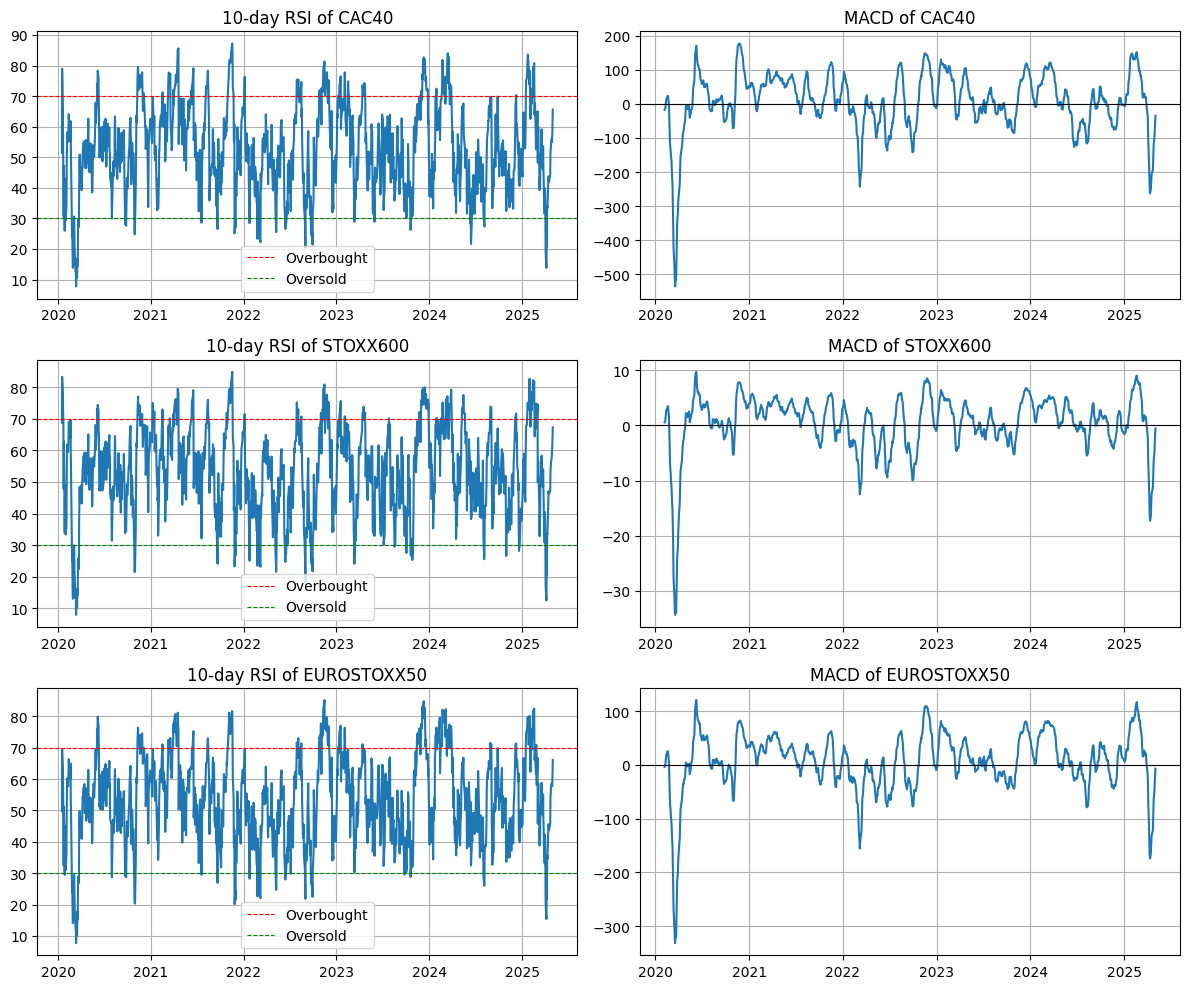

In [5]:
rsi_columns = ["RSI_10_CAC40", "RSI_10_STOXX600", "RSI_10_EUROSTOXX50"]
macd_columns = ["MACD_CAC40", "MACD_STOXX600", "MACD_EUROSTOXX50"]
index_names = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i in range(3):
    # RSI plot
    axes[i, 0].plot(df.index, df[rsi_columns[i]])
    axes[i, 0].set_title(f"10-day RSI of {index_names[i]}")
    axes[i, 0].axhline(70, color='r', linestyle='--', linewidth=0.8, label="Overbought")
    axes[i, 0].axhline(30, color='g', linestyle='--', linewidth=0.8, label="Oversold")
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # MACD plot
    axes[i, 1].plot(df.index, df[macd_columns[i]])
    axes[i, 1].set_title(f"MACD of {index_names[i]}")
    axes[i, 1].axhline(0, color='black', linewidth=0.8)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()
